# Scatterplot vs. Kernel Density Estimation

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [4]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [5]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

(-4.011763847945705, 3.8836862223633459)

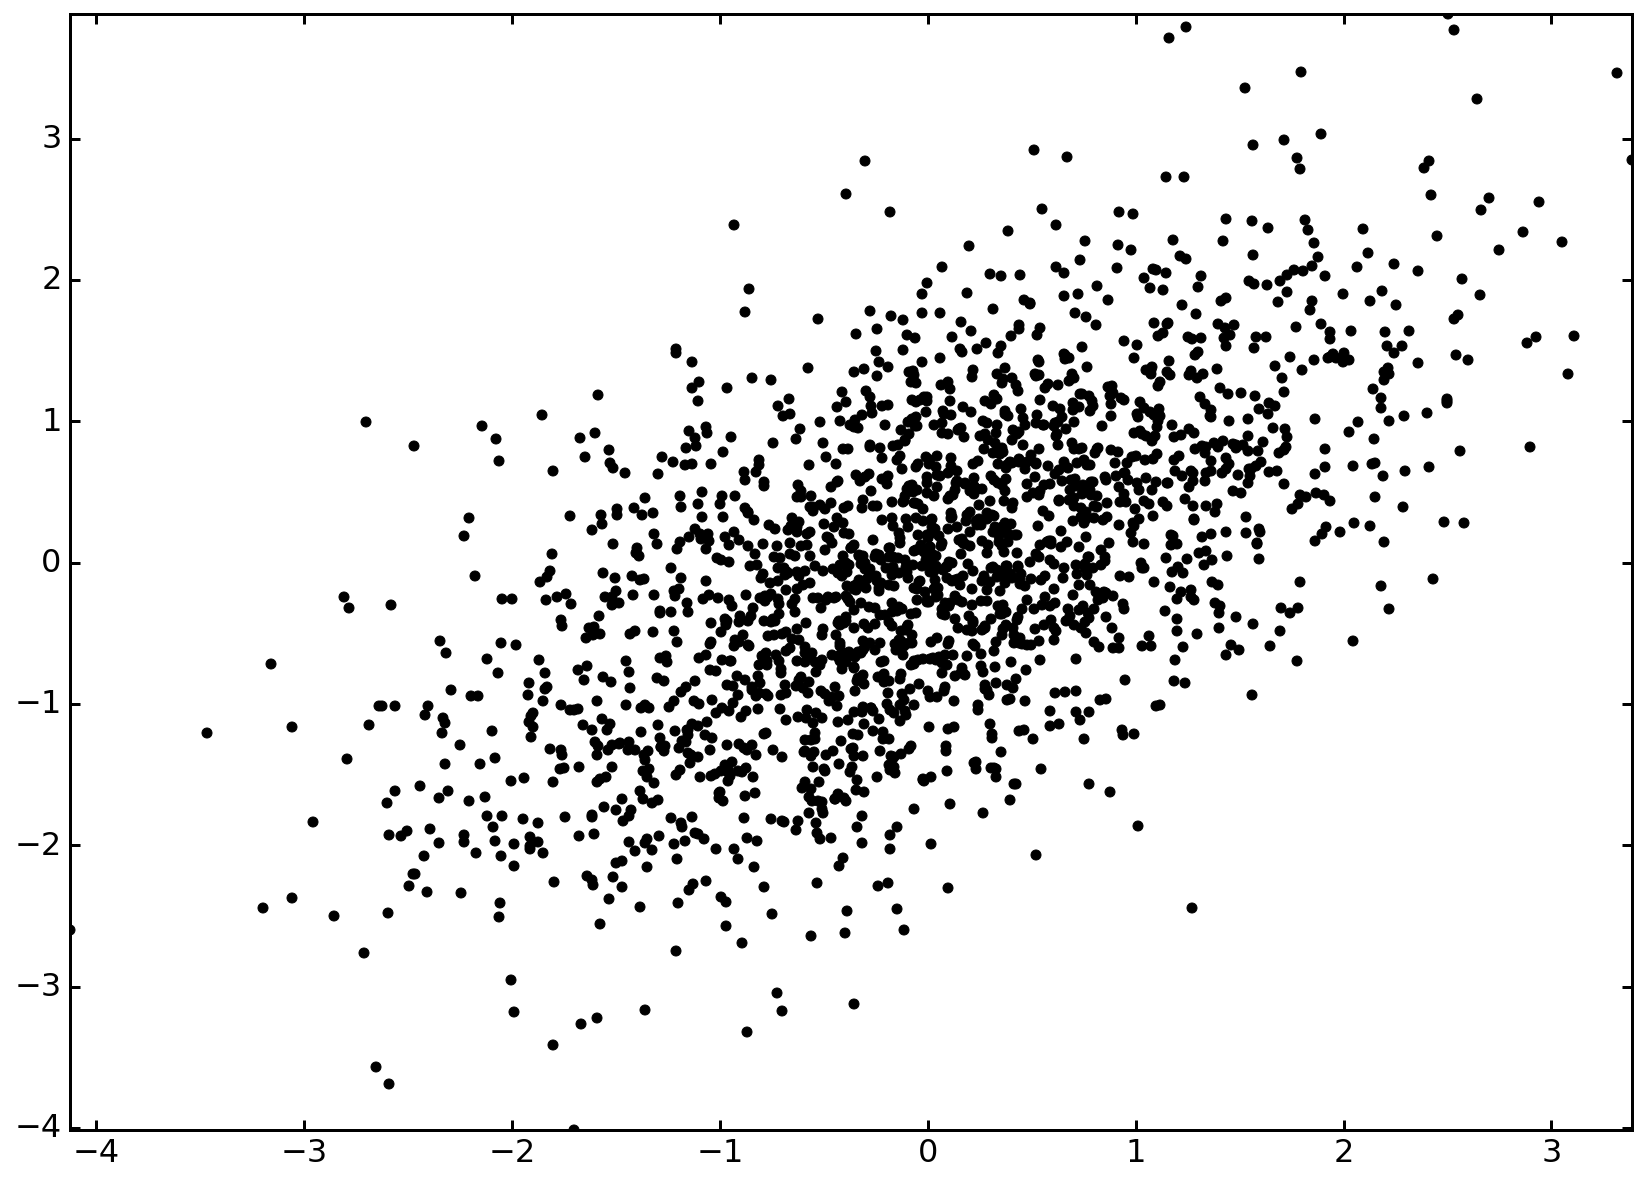

In [8]:
from plot_params import *
plot_params()
fig, ax = plt.subplots(figsize=(14,10))
#ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
#          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=10)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

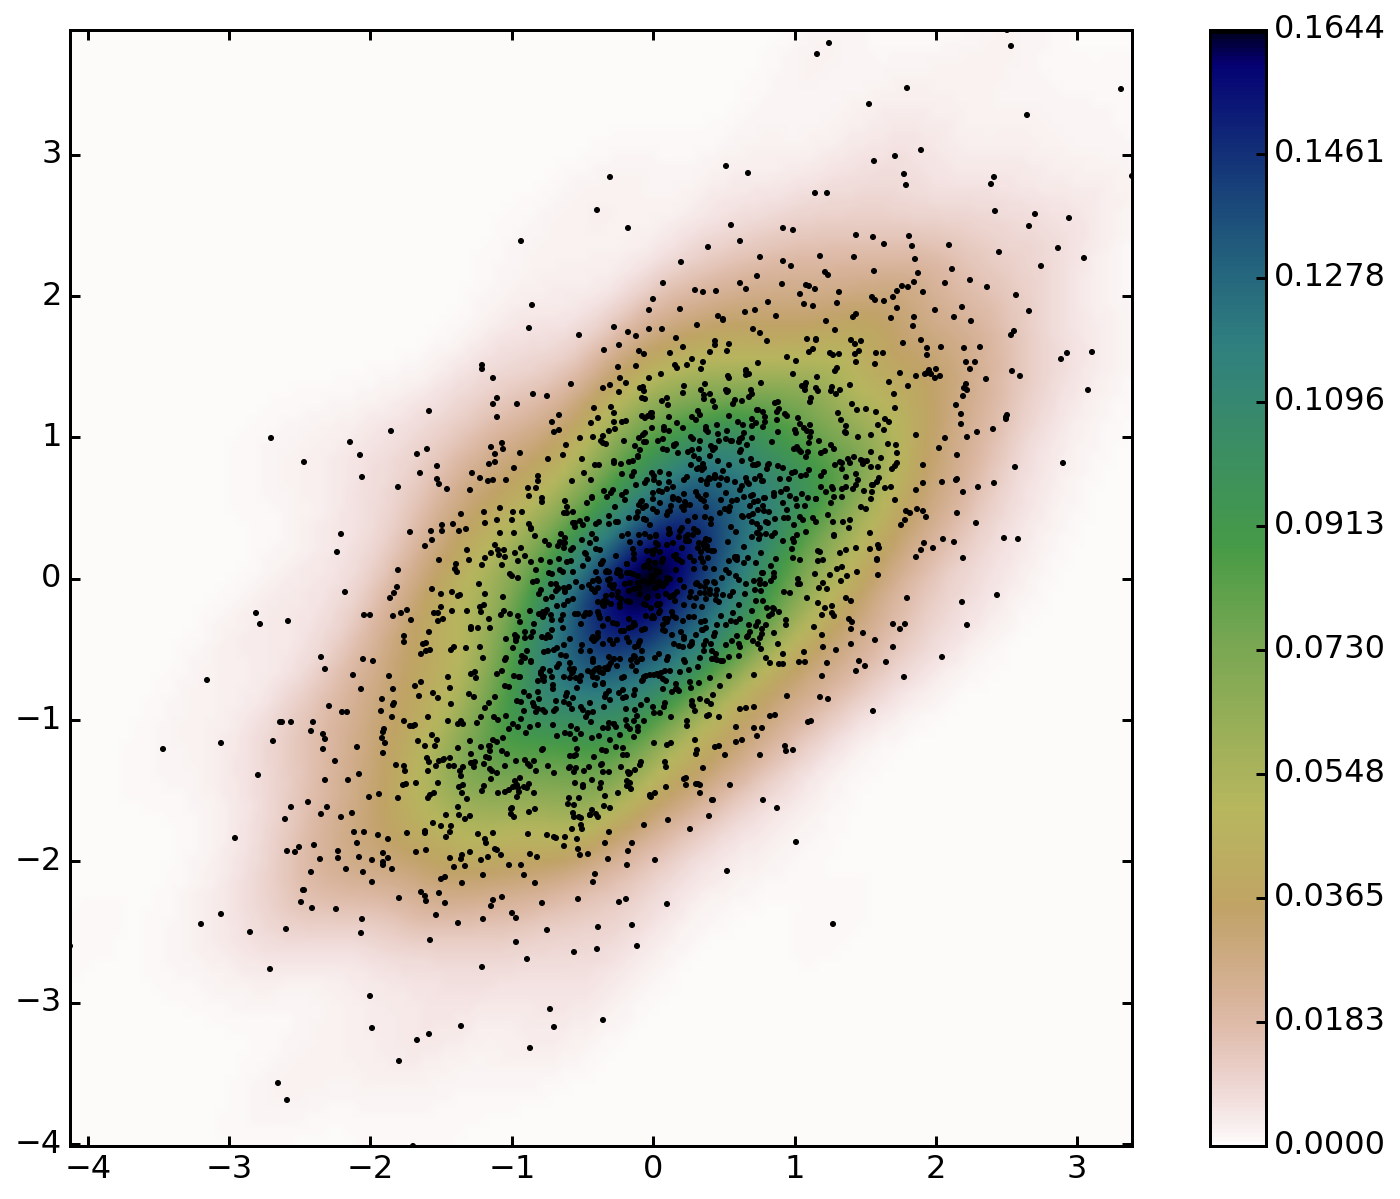

In [28]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.plot(m1, m2, 'k.', markersize=5)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
cbar = fig.colorbar(cax, ticks=np.linspace(0, np.max(Z),10), orientation='vertical')

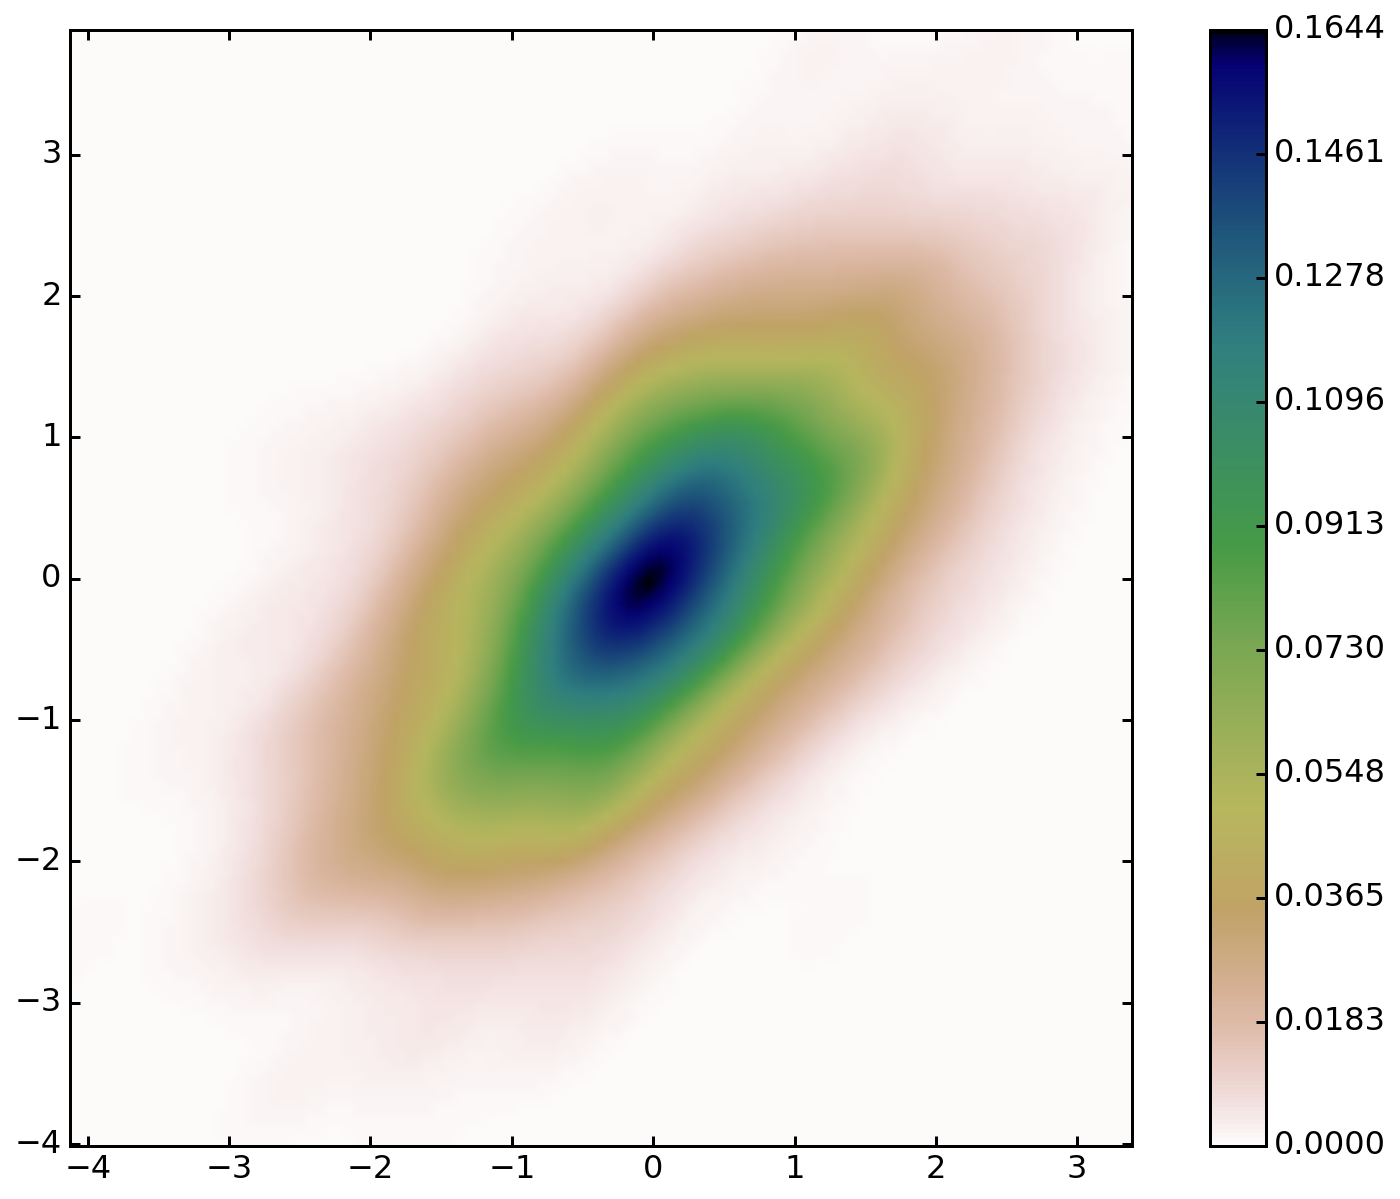

In [10]:
fig, ax = plt.subplots(figsize=(14,10))
cax = ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,
          extent=[xmin, xmax, ymin, ymax])
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
cbar = fig.colorbar(cax, ticks=np.linspace(0, np.max(Z),10), orientation='vertical')

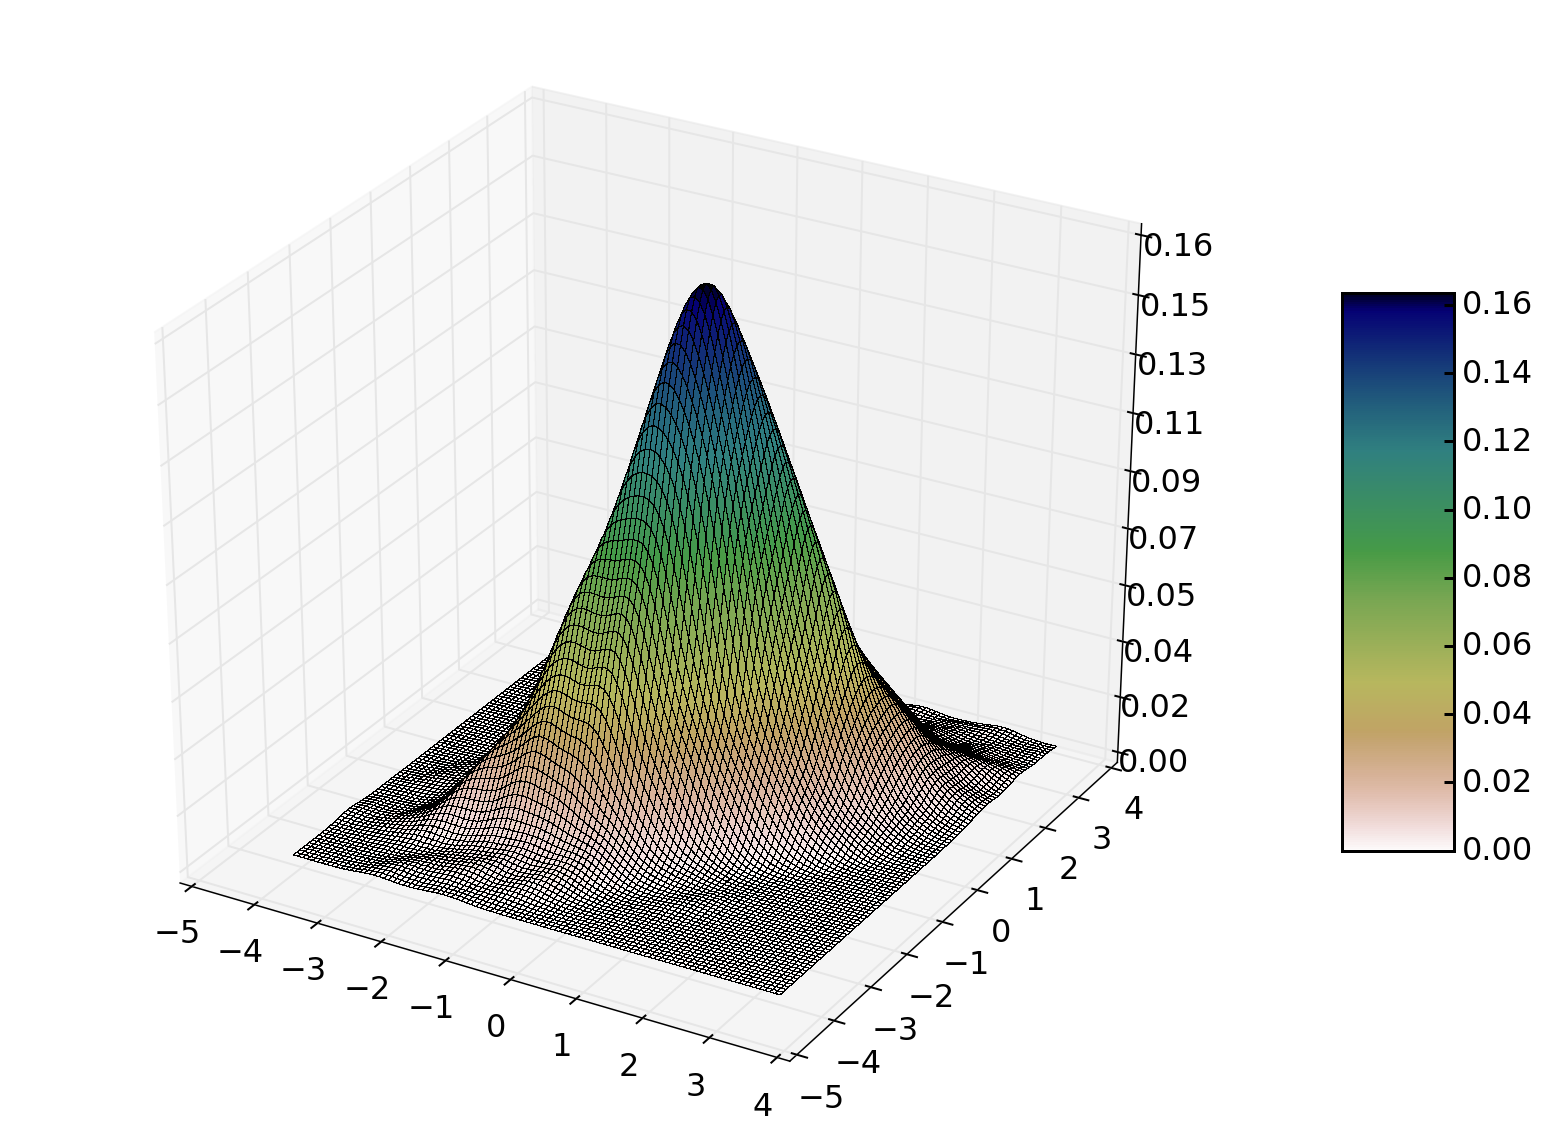

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
fig = plt.figure(99,figsize=(14,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.gist_earth_r,
    linewidth=0.01, antialiased=False)
ax.set_zlim(0.0, np.max(Z))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
